# Predicting a film’s gross revenue

## 1. Load the packages

In [1]:
# Data processing packages
import numpy as np
import pandas as pd
from collections import Counter

# Machine learning packages
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MultiLabelBinarizer

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Others
import time

### 2.1 Read the data

In [2]:
# Use pandas to load into a DataFrame
# Y1. csv doesn’t have a header so
# add one when loading the file
X1 = pd.read_csv("X1.csv")
Y1 = pd.read_csv("Y1.csv", header=None, names=['revenue '])

In [3]:
X1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
X1.columns

Index(['title', 'img_url', 'description', 'ratings', 'n_votes', 'is_adult',
       'production_year', 'runtime', 'genres', 'release_year', 'studio',
       'img_embeddings', 'text_embeddings'],
      dtype='object')

In [5]:
X1.head()

,title,img_url,description,ratings,n_votes,is_adult,production_year,runtime,genres,release_year,studio,img_embeddings,text_embeddings
0,Letters to Juliet,https://m.media-amazon.com/images/M/MV5BMjg0OT...,Letters to Juliet: Directed by Gary Winick. Wi...,6.5,92937.0,0,2010,105,"Adventure,Comedy,Drama",2010.0,Sum.,"[0.25030804, 2.4058464, 1.0431569, 0.030648155...","[-0.6795498, 0.35658365, 0.9994932, -0.9793934..."
1,Veil of Tears,https://m.media-amazon.com/images/M/MV5BZjMxOD...,Veil of Tears: Directed by William Gereghty. W...,7.9,11.0,0,1996,\N,"Action,Crime,Drama",2014.0,WF,"[0.51250213, 2.8152602, 0.46308166, 0.29031387...","[-0.6202415, 0.31657028, 0.9992422, -0.9703722..."
2,International Velvet,https://m.media-amazon.com/images/M/MV5BOGVkYj...,International Velvet: Directed by Bryan Forbes...,5.9,1345.0,0,1978,127,"Drama,Family,Sport",1978.0,MGM,"[0.18073043, 0.24735461, 0.63652813, 0.2496522...","[-0.709996, 0.4233521, 0.99980927, -0.98892415..."
3,8 Seconds,https://m.media-amazon.com/images/M/MV5BYjY4Nz...,8 Seconds: Directed by John G. Avildsen. With ...,6.6,4851.0,0,1994,105,"Biography,Drama,Sport",1994.0,NL,"[0.025015268, 0.9105338, 0.3878257, 0.3421247,...","[-0.7416838, 0.38435012, 0.9998453, -0.9874693..."
4,Penitentiary II,https://m.media-amazon.com/images/M/MV5BNjQyZW...,Penitentiary II: Directed by Jamaa Fanaka. Wit...,4.1,549.0,0,1982,108,"Crime,Drama,Sport",1982.0,MGM,"[0.19079691, 1.9068279, 0.29114372, 0.19527505...","[-0.65501904, 0.3845747, 0.9996712, -0.9766391..."


In [6]:
Y1.head()

,revenue
0,7.158530e+07
1,8.964834e+04
2,3.164907e+07
3,3.898197e+07
4,9.697023e+06


### 2.2 Numerical and categorical features

In [7]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3540 non-null   object 
 1   img_url          3540 non-null   object 
 2   description      3540 non-null   object 
 3   ratings          3540 non-null   float64
 4   n_votes          3540 non-null   float64
 5   is_adult         3540 non-null   int64  
 6   production_year  3540 non-null   int64  
 7   runtime          3540 non-null   object 
 8   genres           3540 non-null   object 
 9   release_year     3540 non-null   float64
 10  studio           3540 non-null   object 
 11  img_embeddings   3540 non-null   object 
 12  text_embeddings  3540 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 359.7+ KB


In [8]:
numeric_features = X1.select_dtypes(include="number").columns.tolist()
non_numeric_features = X1.select_dtypes(exclude="number").columns.tolist()
embedding_features = ['img_url', 'description', 'img_embeddings', 'text_embeddings']

In [9]:
numeric_features.remove('is_adult')
categorical_features = non_numeric_features.copy()
[categorical_features.remove(col) for col in embedding_features]
categorical_features.append('is_adult')

In [10]:
numeric_features, categorical_features, embedding_features

(['ratings', 'n_votes', 'production_year', 'release_year'],
 ['title', 'runtime', 'genres', 'studio', 'is_adult'],
 ['img_url', 'description', 'img_embeddings', 'text_embeddings'])

In [11]:
X1_num, X1_cat, X1_embed = X1.loc[:, numeric_features], X1.loc[:, categorical_features], X1.loc[:, embedding_features]

In [12]:
X1_num.head()

,ratings,n_votes,production_year,release_year
0,6.5,92937.0,2010,2010.0
1,7.9,11.0,1996,2014.0
2,5.9,1345.0,1978,1978.0
3,6.6,4851.0,1994,1994.0
4,4.1,549.0,1982,1982.0


In [13]:
X1_cat.head()

,title,runtime,genres,studio,is_adult
0,Letters to Juliet,105,"Adventure,Comedy,Drama",Sum.,0
1,Veil of Tears,\N,"Action,Crime,Drama",WF,0
2,International Velvet,127,"Drama,Family,Sport",MGM,0
3,8 Seconds,105,"Biography,Drama,Sport",NL,0
4,Penitentiary II,108,"Crime,Drama,Sport",MGM,0


In [14]:
X1_embed.head()

,img_url,description,img_embeddings,text_embeddings
0,https://m.media-amazon.com/images/M/MV5BMjg0OT...,Letters to Juliet: Directed by Gary Winick. Wi...,"[0.25030804, 2.4058464, 1.0431569, 0.030648155...","[-0.6795498, 0.35658365, 0.9994932, -0.9793934..."
1,https://m.media-amazon.com/images/M/MV5BZjMxOD...,Veil of Tears: Directed by William Gereghty. W...,"[0.51250213, 2.8152602, 0.46308166, 0.29031387...","[-0.6202415, 0.31657028, 0.9992422, -0.9703722..."
2,https://m.media-amazon.com/images/M/MV5BOGVkYj...,International Velvet: Directed by Bryan Forbes...,"[0.18073043, 0.24735461, 0.63652813, 0.2496522...","[-0.709996, 0.4233521, 0.99980927, -0.98892415..."
3,https://m.media-amazon.com/images/M/MV5BYjY4Nz...,8 Seconds: Directed by John G. Avildsen. With ...,"[0.025015268, 0.9105338, 0.3878257, 0.3421247,...","[-0.7416838, 0.38435012, 0.9998453, -0.9874693..."
4,https://m.media-amazon.com/images/M/MV5BNjQyZW...,Penitentiary II: Directed by Jamaa Fanaka. Wit...,"[0.19079691, 1.9068279, 0.29114372, 0.19527505...","[-0.65501904, 0.3845747, 0.9996712, -0.9766391..."


### 2.3 Data visualization

/Users/maurice/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


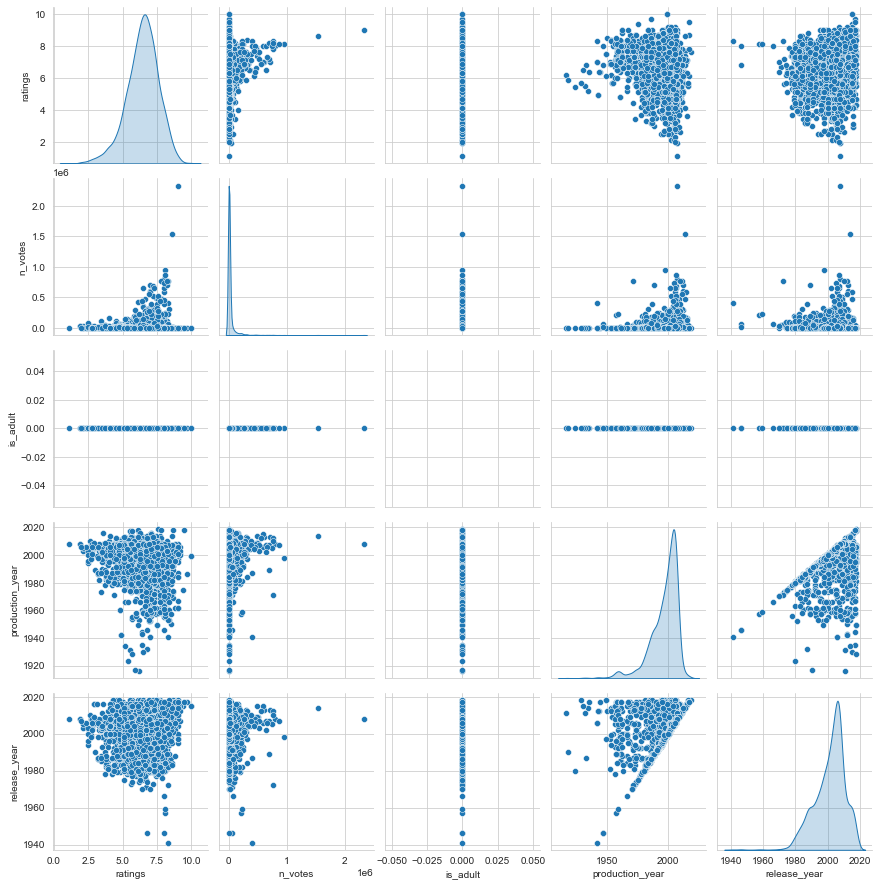

In [23]:
sns.pairplot(X1, diag_kind="kde")

#### 2.3.1 Revenue histogram

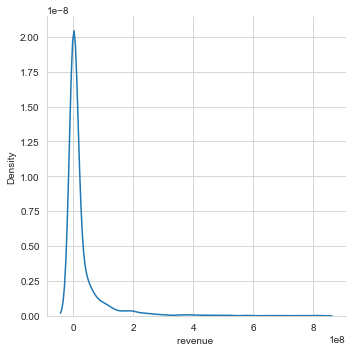

In [15]:
sns.set_style("whitegrid")
sns.displot(data=Y1, x='revenue ', kind='kde')
plt.show()

In [16]:
# log revenue
Y1['log_revenue'] = np.log1p(Y1['revenue ']) # using natural log of (1 + input), when input is null, the value will be 0

In [17]:
Y1.head()

,revenue,log_revenue
0,7.158530e+07,18.086400
1,8.964834e+04,11.403661
2,3.164907e+07,17.270220
3,3.898197e+07,17.478610
4,9.697023e+06,16.087330


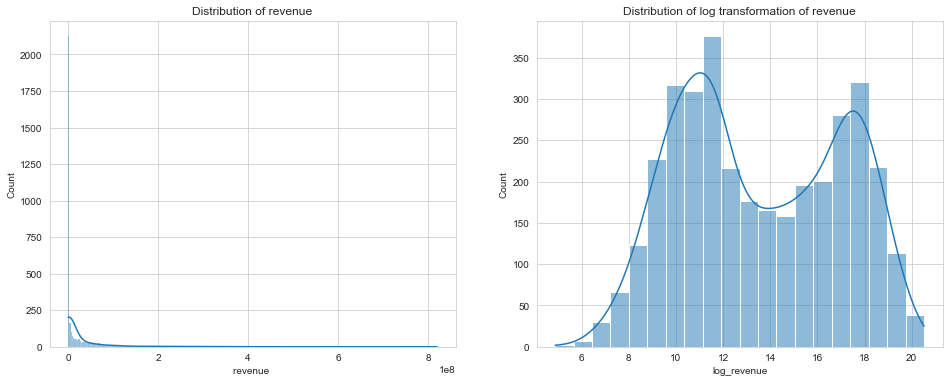

In [18]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
sns.histplot(Y1['revenue '], kde=True)
plt.title('Distribution of revenue')
plt.subplot(1, 2, 2)
sns.histplot(Y1['log_revenue'], kde=True)
plt.title('Distribution of log transformation of revenue')
plt.show()

In [19]:
print("There isn\'t null value for the revenue") if np.sum(Y1['log_revenue'] == 0) == 0 else print("There exists null value for the revenue")

There isn't null value for the revenue


#### 2.3.2 Revenue v.s. ratings

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(X1_num['ratings'], Y1['revenue '])
plt.title('Revenue vs ratings fig(1)')
plt.xlabel('Ratings')
plt.ylabel('Revenue')
plt.subplot(1, 2, 2)
plt.scatter(X1_num['ratings'], Y1['log_revenue'])
plt.title('Log revenue vs ratings fig(2)')
plt.xlabel('Ratings')
plt.ylabel('$log(1 + Revenue)$')

In [ ]:
print("There isn\'t null value for the ratings") if np.sum(np.log1p(X1_num['ratings']) == 0) == 0 else print("There exists null value for the ratings")

#### 2.3.3 Revenue v.s. votes

In [ ]:
X1_num['log_votes'] = np.log1p(X1_num['n_votes'])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(X1_num['n_votes'], Y1['revenue '])
plt.title('Revenue vs votes fig(1)')
plt.xlabel('n_votes')
plt.ylabel('Revenue')
plt.subplot(1, 2, 2)
plt.scatter(X1_num['log_votes'], Y1['log_revenue'])
plt.title('Log revenue vs log votes fig(2)')
plt.xlabel('$log(1 + n\_votes)$')
plt.ylabel('$log(1 + Revenue)$')

In [ ]:
print("There isn\'t null value for the votes") if np.sum(X1_num['log_votes'] == 0) == 0 else print("There exists null value for the votes")

#### 2.3.4 Revenue v.s. production year

In [ ]:
X1_num['production_year'].unique()

In [ ]:
plt.figure(figsize=(16, 8))

sns.scatterplot(X1_num['production_year'], Y1['revenue '], c=X1_num['production_year'])
plt.title('Revenue vs votes fig(1)')
plt.xlabel('production_year')
plt.ylabel('Revenue')

#### 2.3.5 Revenue v.s. release year


In [ ]:
X1_num['release_year'].unique()

In [ ]:
plt.figure(figsize=(16, 8))

sns.scatterplot(X1_num['release_year'], Y1['revenue '], c=X1_num['release_year'])
plt.title('Revenue vs votes fig(1)')
plt.xlabel('release_year')
plt.ylabel('Revenue')

#### 2.3.6 Revenue v.s. title

In [ ]:
for i in X1_cat['title']:
    if len(i) <= 4:
        print(i)

There is no null value for title

## 3. Data Engineering

### 3.0 Missing Value

In [ ]:
X1_cat['genres'].head()

In [ ]:
np.sum(X1_cat['genres'] == "\\N")

In [ ]:
# removing the rows with null value
remove_id = X1_cat[X1_cat['genres'] == "\\N"].index
# X1_cat.drop(remove_id, axis=0, inplace=True)

In [ ]:
X1_cat.loc[X1_cat['genres'] == "\\N", "genres"] = "Others"

In [ ]:
X1_cat

### 3.2 Categorical data process

`title`, `runtime`, `genres`, `studio` and `is_adult` columns

In [ ]:
X1_cat.head()

### 3.2.1 Run Time processing

Use the median value to replace the data with "\\N" for the `runtime` column, and move it to the numerical data.

In [ ]:
X1_cat['runtime'].describe()

In [ ]:
np.sum(X1_cat['runtime'] == '\\N')

In [ ]:
X1_cat.head()

In [ ]:
median_runtime = np.median(X1_cat.loc[X1_cat['runtime'] != '\\N', 'runtime'].astype(np.int64))

In [ ]:
X1_cat['runtime'] = np.where(X1_cat['runtime'] == '\\N', median_runtime, X1_cat['runtime']).astype(np.int64)

In [ ]:
X1_num['runtime'] = X1_cat['runtime']

In [ ]:
X1_cat.drop(['runtime'], axis=1, inplace=True)

In [ ]:
X1_num.head()

In [ ]:
X1_cat.head()

### 3.2.2 Studio column processing

The `studio` column will be transfomed as frequency of studio that appears in this dataset, and move it to numerical dataset.

There is not nan values in `studio` column

In [ ]:
X1_cat['studio'].value_counts()

In [ ]:
def catToFrequency(dataset, column_name, inplace=False):
    column = dataset[column_name]
    counts = Counter(column)

    dict_cat_freq = {}

    for category, freq in counts.most_common():
        dict_cat_freq[category] = freq / len(column)

    new_column = column.apply(lambda x: dict_cat_freq[x])

    if inplace:
        dataset[column_name] = new_column
        return
    else:
        return new_column

In [ ]:
X1_cat['studio'] = catToFrequency(X1_cat, 'studio')

In [ ]:
X1_num['studio_freq'] = X1_cat['studio']

In [ ]:
X1_num.head()

In [ ]:
X1_cat.drop(['studio'], axis=1, inplace=True)

In [ ]:
X1_cat.head()

### Genres processing

There're 4 rows do not have genres, we just remove these 4 rows.

In [ ]:
X1_cat['genres'].head()

In [ ]:
np.sum(X1_cat['genres'] == "\\N")

In [ ]:
# removing the rows with null value
X1_cat[X1_cat['genres'] == "\\N"].index

In [ ]:
generes_list = []
for row in X1_cat['genres']:
    for element in row.split(','):
        generes_list.append(element)

In [ ]:
set(generes_list)

In [ ]:
X1_cat['genres_split'] = X1_cat['genres'].apply(lambda x: x.split(","))

In [ ]:
mlb = MultiLabelBinarizer()
genere_encoder = pd.DataFrame(mlb.fit_transform(X1_cat['genres_split']))
genere_encoder.columns = mlb.classes_.tolist()

In [ ]:
genere_encoder

In [ ]:
X1_cat

In [ ]:
X1_cat = pd.concat([X1_cat, genere_encoder], axis=1).drop(['genres', 'genres_split'], axis=1)

In [ ]:
X1_cat